In [1]:
from netCDF4 import Dataset
nc = Dataset('APCP.NC','r')
nc


<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    history: 2022-02-01 04:04:39 GMT Hyrax-1.13.4 https://amd.rd.naro.go.jp:443/opendap/AMD/Area1/2021/AMD_Area1_APCP.nc.nc?geogrid(APCP,40.34763205639712,140.00639579051995,40.20499263124444,140.14306947743816,"44194<time","time<44549")
    dimensions(sizes): time(354), lat(19), lon(12)
    variables(dimensions): float64 time(time), float32 lat(lat), float32 lon(lon), float32 APCP(time, lat, lon)
    groups: 

In [2]:
nc.dimensions

{'time': <class 'netCDF4._netCDF4.Dimension'>: name = 'time', size = 354,
 'lat': <class 'netCDF4._netCDF4.Dimension'>: name = 'lat', size = 19,
 'lon': <class 'netCDF4._netCDF4.Dimension'>: name = 'lon', size = 12}

In [3]:
nc.variables.keys()

dict_keys(['time', 'lat', 'lon', 'APCP'])

In [4]:
nc['APCP']

<class 'netCDF4._netCDF4.Variable'>
float32 APCP(time, lat, lon)
    _FillValue: 9.96921e+36
    long_name: Daily precipitation
    units: mm
unlimited dimensions: 
current shape = (354, 19, 12)
filling on

In [5]:
nc['time']

<class 'netCDF4._netCDF4.Variable'>
float64 time(time)
    _FillValue: 9.969209968386869e+36
    calendar: standard
    units: days since 1900-1-1 00:00:0.0
unlimited dimensions: 
current shape = (354,)
filling on

In [6]:
import geopandas as gpd
df474 = gpd.read_file('474+120圃場.geojson')

In [7]:
df474 = df474.to_crs('EPSG:4612')
df474_min_xy = df474
df474_min_xy['lon'] = (df474_min_xy['geometry'].centroid.x)
df474_min_xy['lat'] = (df474_min_xy['geometry'].centroid.y)


/tmp/ipykernel_7214/713132183.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df474_min_xy['lon'] = (df474_min_xy['geometry'].centroid.x)
/tmp/ipykernel_7214/713132183.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df474_min_xy['lat'] = (df474_min_xy['geometry'].centroid.y)


In [8]:
import xarray as xr
rainfall_2021 = xr.open_dataarray('APCP.NC')
rainfall_mean = xr.open_dataarray('APCP_mea.nc')

In [9]:
rainfall_2021.head

<bound method DataArray.head of <xarray.DataArray 'APCP' (time: 354, lat: 19, lon: 12)>
array([[[     nan, 0.      , ..., 1.830548, 1.890035],
        [     nan,      nan, ..., 1.78305 , 1.851439],
        ...,
        [0.      , 0.      , ..., 0.903651, 1.085153],
        [0.      , 0.      , ..., 0.89895 , 1.08613 ]],

       [[     nan, 0.924079, ..., 2.30406 , 2.403155],
        [     nan,      nan, ..., 2.287456, 2.399901],
        ...,
        [0.932702, 0.940246, ..., 1.639886, 1.762363],
        [0.940068, 0.961454, ..., 1.640721, 1.765591]],

       ...,

       [[     nan, 3.085468, ..., 4.588468, 4.6265  ],
        [     nan,      nan, ..., 4.575217, 4.631919],
        ...,
        [4.650898, 4.765364, ..., 4.681128, 4.519068],
        [4.684963, 4.810871, ..., 4.697586, 4.53403 ]],

       [[     nan, 5.132504, ..., 5.694015, 5.599537],
        [     nan,      nan, ..., 5.643414, 5.578401],
        ...,
        [4.682021, 4.769897, ..., 5.409069, 5.335442],
        [4.70895

In [10]:
import pandas as pd
df_rainfall_2021 = pd.DataFrame()
df_rainfall_mean = pd.DataFrame()
for i in range(474):
    lat1 = df474_min_xy['lat'][i]
    lon1 = df474_min_xy['lon'][i]
    location_df = rainfall_2021.sel(lat=lat1,lon=lon1,method='nearest').to_dataframe()
    df_rainfall_2021 = df_rainfall_2021.append(location_df)
    
for i in range(474):
    lat1 = df474_min_xy['lat'][i]
    lon1 = df474_min_xy['lon'][i]
    location_df = rainfall_mean.sel(lat=lat1,lon=lon1,method='nearest').to_dataframe()
    df_rainfall_mean = df_rainfall_mean.append(location_df)

In [11]:
df_rainfall_2021['xy'] = df_rainfall_2021['lat'].astype(str) + ',' + df_rainfall_2021['lon'].astype(str)
df_rainfall_mean['xy'] = df_rainfall_mean['lat'].astype(str) + ',' + df_rainfall_mean['lon'].astype(str)


In [12]:
df_rainfall_2021['time'] = df_rainfall_2021.index
df_rainfall_2021['time'] = pd.to_datetime(df_rainfall_2021['time'])

df_rainfall_mean['time'] = df_rainfall_mean.index
df_rainfall_mean['time'] = pd.to_datetime(df_rainfall_mean['time'])

In [13]:
df_rainfall_2021

,lat,lon,APCP,xy,time
time,,,,,
2021-01-01,40.270832,140.018753,0.000000,"40.270832,140.01875",2021-01-01
2021-01-02,40.270832,140.018753,0.994340,"40.270832,140.01875",2021-01-02
2021-01-03,40.270832,140.018753,0.000000,"40.270832,140.01875",2021-01-03
2021-01-04,40.270832,140.018753,0.000000,"40.270832,140.01875",2021-01-04
2021-01-05,40.270832,140.018753,0.000000,"40.270832,140.01875",2021-01-05
...,...,...,...,...,...
2021-12-16,40.287498,140.068756,4.946250,"40.2875,140.06876",2021-12-16
2021-12-17,40.287498,140.068756,10.630684,"40.2875,140.06876",2021-12-17
2021-12-18,40.287498,140.068756,11.100202,"40.2875,140.06876",2021-12-18


In [14]:


point_1_df_rainfall_2021 = df_rainfall_2021.groupby('xy').get_group(df_rainfall_2021['xy'].unique()[1])
point_1_df_rainfall_mean = df_rainfall_mean.groupby('xy').get_group(df_rainfall_mean['xy'].unique()[1])



In [15]:
point_1_df_rainfall_2021.head()

,lat,lon,APCP,xy,time
time,,,,,
2021-01-01,40.279167,140.081253,0.703454,"40.279167,140.08125",2021-01-01
2021-01-02,40.279167,140.081253,1.467474,"40.279167,140.08125",2021-01-02
2021-01-03,40.279167,140.081253,0.642065,"40.279167,140.08125",2021-01-03
2021-01-04,40.279167,140.081253,0.500701,"40.279167,140.08125",2021-01-04
2021-01-05,40.279167,140.081253,0.000000,"40.279167,140.08125",2021-01-05


In [16]:
#月毎の集計
x_2021=pd.DataFrame()
x_mean=pd.DataFrame()
x_2021['APCP'] = point_1_df_rainfall_2021['APCP'].resample(rule='M').sum()
x_mean['APCP'] = point_1_df_rainfall_mean['APCP'].resample(rule='M').sum()
#x_2021['time'] = point_1_df_rainfall_2021['time'].resample(rule='M')
#x_mean['time'] = point_1_df_rainfall_mean['time'].resample(rule='M')
#x_2021.to_csv('2021.csv',index=False)
#x_mean.to_csv('mean.csv',index=False)

In [17]:
x_2021.head

<bound method NDFrame.head of                    APCP
time                   
2021-01-31  2125.008545
2021-02-28  1707.739990
2021-03-31  2464.860352
2021-04-30  1927.539307
2021-05-31  3172.406982
2021-06-30  1430.665161
2021-07-31  1874.658569
2021-08-31  2875.605713
2021-09-30  1437.095093
2021-10-31  3057.627930
2021-11-30  3754.547363
2021-12-31  2070.512451>

In [18]:
x_mean.head

<bound method NDFrame.head of                    APCP
time                   
2021-01-31  2206.176514
2021-02-28  1630.265015
2021-03-31  1631.656494
2021-04-30  1489.499268
2021-05-31  1757.328979
2021-06-30  1903.598145
2021-07-31  3312.377197
2021-08-31  2925.535156
2021-09-30  2740.438477
2021-10-31  2547.248535
2021-11-30  2482.873047
2021-12-31  1595.464111>

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib

In [20]:
df_rainfall_2021.head()

,lat,lon,APCP,xy,time
time,,,,,
2021-01-01,40.270832,140.018753,0.00000,"40.270832,140.01875",2021-01-01
2021-01-02,40.270832,140.018753,0.99434,"40.270832,140.01875",2021-01-02
2021-01-03,40.270832,140.018753,0.00000,"40.270832,140.01875",2021-01-03
2021-01-04,40.270832,140.018753,0.00000,"40.270832,140.01875",2021-01-04
2021-01-05,40.270832,140.018753,0.00000,"40.270832,140.01875",2021-01-05


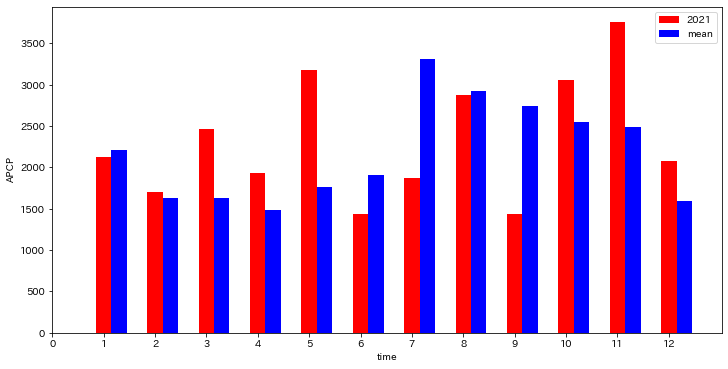

In [24]:
import numpy as np

df_2021=pd.read_csv('2021.csv')
df_mean=pd.read_csv('mean.csv')

labels = [1,2,3,4,5,6,7,8,9,10,11,12]

x= df_2021['time']
x_2 = df_mean['time']
    
y = df_2021['APCP']
y_2 = df_mean['APCP']

plt.figure(figsize=(12,6))
plt.bar(x,y,color='red',label='2021',align='center',width=0.3)
plt.bar(x+0.3,y_2,color='blue',label='mean',align='center',width=0.3)
plt.xlabel('time')
plt.ylabel('APCP')
plt.xticks(np.arange(0, 13, step=1))
plt.legend()

plt.show()

In [ ]:
#for i in range(0,34):

#    x= df_rainfall_2021.groupby('xy').get_group(df_rainfall_2021['xy'].unique()[i])['time']
#    x_2 = df_rainfall_mean.groupby('xy').get_group(df_rainfall_mean['xy'].unique()[i])['time']
    
#    y = df_rainfall_2021.groupby('xy').get_group(df_rainfall_2021['xy'].unique()[i])['APCP'].rolling(7).mean().round(1)
#    y_2 = df_rainfall_mean.groupby('xy').get_group(df_rainfall_mean['xy'].unique()[i])['APCP'].rolling(7).mean().round(1)
    
#    plt.bar(x,y,color='red')
#    plt.bar(x_2,y_2,color='blue')
    
#plt.set_xlabel('time')
#plt.set_ylabel('APCP')
    
#    plt.legend(loc=2)

#    plt.tight_layout()
#    plt.show()

In [ ]:
df = pd.read_csv('0_mean.csv')
df.head()

,lat,lon,APCP_mean,xy,time,APCP_2021
0,40.270832,140.01875,3.993308,"40.270832,140.01875",2021/1/1,0.00000
1,40.270832,140.01875,3.971509,"40.270832,140.01875",2021/1/2,0.99434
2,40.270832,140.01875,3.939961,"40.270832,140.01875",2021/1/3,0.00000
3,40.270832,140.01875,3.837319,"40.270832,140.01875",2021/1/4,0.00000
4,40.270832,140.01875,3.803611,"40.270832,140.01875",2021/1/5,0.00000


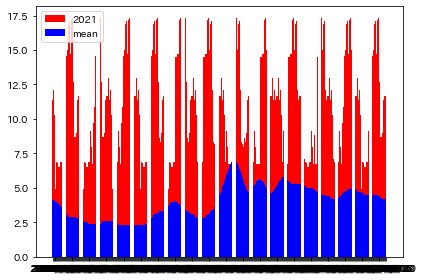

In [ ]:
x=df['time']
y=df['APCP_2021'].rolling(7).mean().round(1)
y_2=df['APCP_mean'].rolling(7).mean().round(1)

plt.bar(x,y,color='red',label='2021')
plt.bar(x,y_2,color='blue',label='mean')
    
#plt.set_xlabel('time')
#plt.set_ylabel('APCP')
    
plt.legend()

plt.tight_layout()
plt.show()